# Clustering

- K-Means
- Quality Metrics
- Real Data Example
- Hierarchical Clustering
- DBSCAN

In [5]:
import pandas as pd
import numpy as np
import numpy.testing as np_testing
import matplotlib.pyplot as plt

%matplotlib inline

# K-Means

In [6]:
from sklearn import datasets

n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(centers=5, n_samples=n_samples, random_state=random_state, center_box=(-10, 10))

# To play with
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X = np.random.rand(n_samples, 2)

In [7]:
# example of object in the feature matrix
X[:5]

array([[-5.00501671,  0.11459513],
       [ 2.27738452, -0.118907  ],
       [ 8.406718  , -0.86503325],
       [ 5.11429625, -9.12590002],
       [-9.41312681, -4.70382878]])

In [8]:
# example of cluster labels
y[:5]

array([1, 2, 4, 3, 0])

In [9]:
def plot_clusters(X, y):
    # plt.figure(figsize=(6, 4))
    
    if y is not None:
        for cluster_label in np.unique(y):
            # Plot all objects with y == i
            plt.scatter(X[y == cluster_label, 0],     # selects all objects with y == i and the 1st column of X
                        X[y == cluster_label, 1],     # selects all objects with y == i and the 2nd column of X
                        label=str(cluster_label))     # label for the plot legend
    else:
        plt.scatter(X[:, 0], X[:, 1], label='samples')

    plt.xlabel('X1', size=12)
    plt.ylabel('X2', size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.legend(loc='best', fontsize=12)
    plt.grid()

    plt.show()

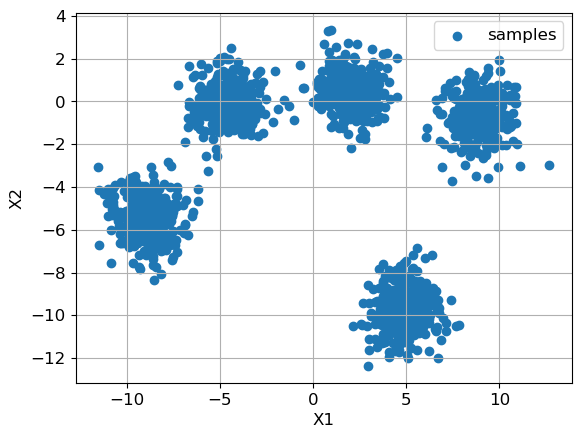

In [10]:
plot_clusters(X, y=None)

## K-Means Algorithm

Suppose we have $N$ samples and $K$ clusters. Each cluster is described by its center (centroid) with coordinates $\mu_{j}$. The centroids are estimated by minimizing **within-cluster distance criterion**:

$$
L = \sum_{i=1}^{N} \min_{\mu_{k}} \rho(x_{i}, \mu_{k}) \to \min_{\mu_{1}, ..., \mu_{K}}
$$

$$
\rho(x_{i}, \mu_{k}) = || x_{i} - \mu_{k} ||^{2}
$$

where $x_{i}$ is an object coordinates, $\rho(x_{i}, \mu_{k})$ is distance between the $i$-th object and the $k$-th cluster's centroid.

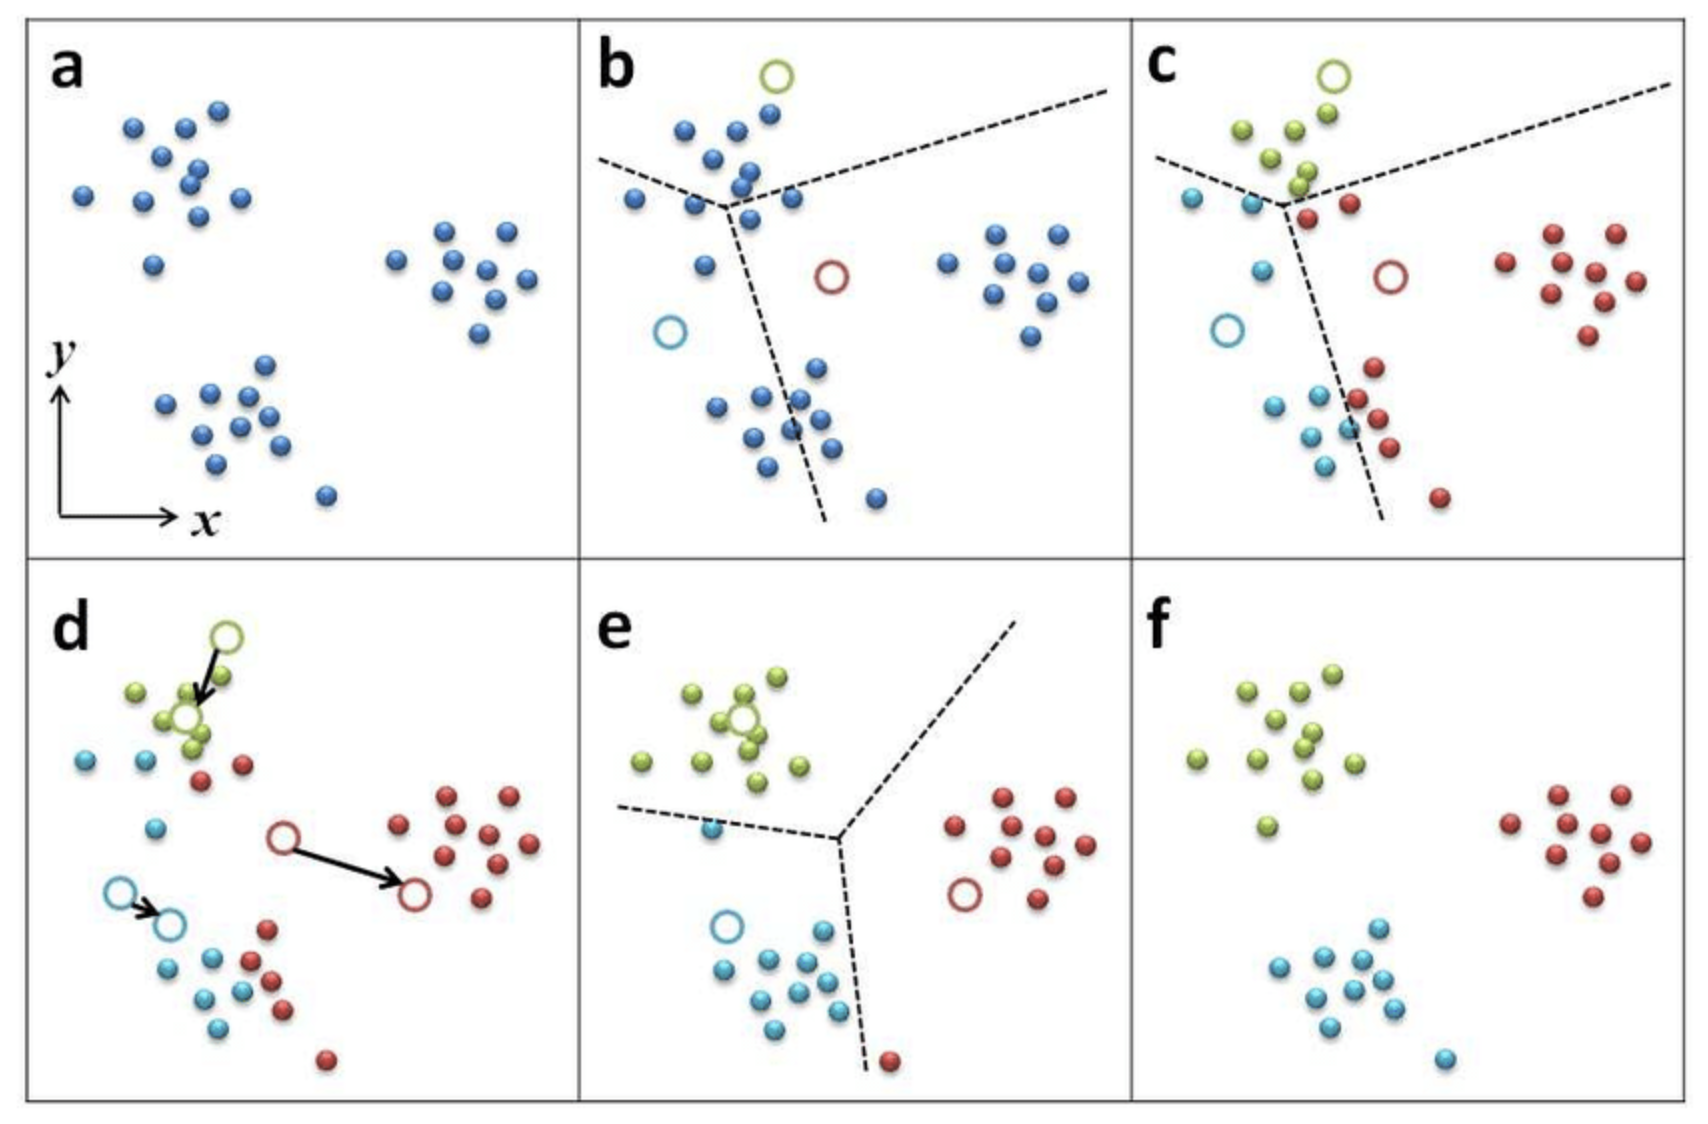

#### Task: implement cluster centers initialization.

**Hint:** use `sklearn.utils.resample()` function with `random_state=11` and `replace=False`.

In [15]:
from sklearn.utils import resample

def init_cluster_centers(X, n_clusters):
    """
    Initialize cluster centers.

    Parameters:
    -----------
    X: numpy.array
        Object coordinates.
    n_clusters: int
        Number of clusters.
    
    Returns:
    --------
    cluster_centers: numpy.array
        Initialized cluster centers.
    """
    
    raise NotImplementedError
    
    return cluster_centers

In [17]:
cluster_centers = init_cluster_centers(X, n_clusters=5)

Expected output:

<center>   
    
```python
array([[ 4.90859405, -9.47195561],
       [ 0.93873614,  0.72814128],
       [-3.97968071,  0.54670645],
       [-8.54689292, -5.7938369 ],
       [ 9.78203287, -1.31122135]])
    
``` 
    
</center>

#### Task: For the given cluster centers find cluster labels for each object in the sample.
An object is assigned to the closest center based on euclidean distance. 

**Hint:** create a matrix of distances between the objects and cluster centers. Each row in this matrix corresponds to one object, each column corresponds to one cluster. Then, use `np.argmin()` function to find the closest center for each object.

In [9]:
def predict_for_centers(cluster_centers, X):
    """
    Predict cluster labels based on their centroids.

    Parameters:
    -----------
    cluster_centers: numpy.array
        Array of the cluster centers.
    X: numpy.array
        Object coordinates.

    Returns:
    --------
    labels: numpy.array
        Predicted cluster labels. Example: labels = [0, 0, 1, 1, 0, 2, ...].
    """
    
    raise NotImplementedError

    return labels

In [10]:
labels = predict_for_centers(cluster_centers, X)
assert np.all(labels[:10] == np.array([2, 1, 4, 0, 3, 1, 0, 4, 4, 2]))

Expected output:

<center>   
    
```python
array([2, 1, 4, 0, 3, 1, 0, 4, 4, 2])
    
``` 
    
</center>

#### Task: Recalculate cluster centers using cluster labels estimated previously. 

**Hint:** select all objects from one cluster and find mean values of the object coordinates in this cluster. Repeat this for all clusters.

In [11]:
def calculate_cluster_centers(X, labels):
    """
    Estimate cluster centers based on objects in these clusters.

    Parameters:
    -----------
    X: numpy.array
        Object coordinates.
    labels: numpy.array
        Cluster labels of the objects.

    Returns:
    --------
    cluster_centers: numpy.array
        Estimated cluster centers.
    """

    
    cluster_centers = []
    cluster_labels = np.unique(labels)

    raise NotImplementedError

    return np.array(cluster_centers)

In [18]:
new_cluster_centers = calculate_cluster_centers(X, labels)

Expected output:

<center>   
    
```python
array([[ 4.86847219, -9.7376866 ],
       [ 1.94782782,  0.47149765],
       [-4.57265217, -0.02942499],
       [-8.8991547 , -5.41650701],
       [ 8.87178022, -0.71222366]])
    
``` 
    
</center>

#### Task: Bring all steps together in one class which implements KMeans Algorithm.
Using functions from the previous tasks, finish `fit()` method of the class below.

In [13]:
class MyKmeans(object):
    
    def __init__(self, n_clusters=2, max_iter=10):
        """
        K-Means clustering algorithms implementation.
        
        Parameters:
        -----------
        n_clusters: int
            Number of clusters.
        max_iters: int
            Number of iterations of the centroids search.
        """
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        # to store found centers
        self.cluster_centers = None
    
    def fit(self, X):
        """
        Run k-Means algorithm for randomly init cluster centers.
        
        Parameters:
        -----------
        X: numpy.array
            Samples coordinates.
        """
        
        # Init cluster centers
        cluster_centers = ...
        
        # Search for cluster centers
        for i in range(self.max_iter):
            ...
            
        self.cluster_centers = cluster_centers
    
    
    def predict(self, X):
        """
        Predict cluster labels.
        
        Parameters:
        -----------
        X: numpy.array
            Samples coordinates.
        
        Returns:
        --------
        y: numpy.array
            Predicted cluster labels. Example: labels = [0, 0, 1, 1, 0, 2, ...].
        """
        
        y = predict_for_centers(self.cluster_centers, X)
        
        return y

In [19]:
clusterer = MyKmeans(n_clusters=5, max_iter=20)
clusterer.fit(X)
y_pred = clusterer.predict(X)

Expected output:

<center>   
    
```python
array([2, 1, 4, 0, 3, 1, 0, 4, 4, 2])
    
``` 
    
</center>

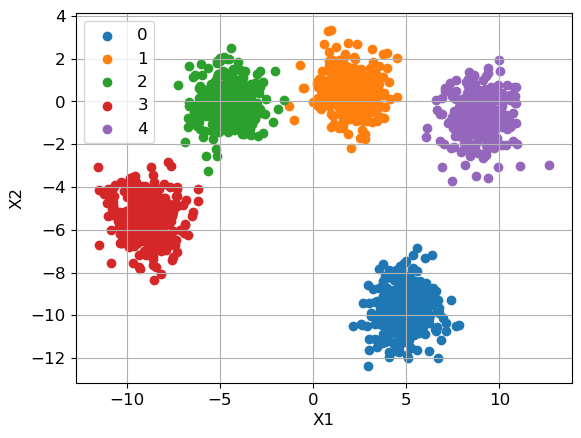

In [15]:
plot_clusters(X, y_pred)

# Quality Metrics

In [20]:
from sklearn import datasets

n_samples = 1500
random_state = 170
n_true_clusters = np.random.RandomState(42).randint(5, 15, 1)[0]
X, y = datasets.make_blobs(centers=n_true_clusters, n_features=10, 
                           n_samples=n_samples, random_state=random_state, center_box=(-10, 10))

# To play with
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X = np.random.rand(n_samples, 2)

In [21]:
# example of object in the feature matrix
X[:2]

array([[ 0.99344339, -0.89337969, -2.15784893, -0.43148636, -9.43358152,
         2.80202479,  3.84977177, -9.24618861,  0.2332514 ,  4.92895554],
       [-7.79262514,  5.54176793, -5.63872553,  3.07350367, 10.17760444,
         5.9834759 , -0.06660814,  8.60245823, 10.09320544, -5.69267   ]])

In [22]:
# example of cluster labels
y[:5]

array([7, 3, 5, 0, 6])

## Metrics

**Silhouette Score:**

$$
s = \frac{b - a}{max(a, b)}
$$

- **a**: The mean distance between a sample and all other points in the same class.
- **b**: The mean distance between a sample and all other points in the next nearest cluster.


**Adjusted Rand Index (ARI):**

$$
ARI = \frac{RI - Expected\_RI}{max(RI) - Expected\_RI}
$$

$$
RI = \frac{TP+TN}{TP+TN+FP+FN}
$$


- TP – number of pairs in the same cluster in predictions and the ground truth,
- TN – number of pairs from different clusters in predictions and the ground truth,
- FP – number of pairs in the same cluster in predictions, but from different clusters    in the ground truth,
- FN – number of pairs in the same cluster in the ground truth, but from the different clusters in predictions.


**Fowlkes-Mallows Index (FMI):**

$$
FMI = \frac{TP}{\sqrt{(TP+FP)(TP+FN)}}
$$

In [25]:
from sklearn.cluster import KMeans
from sklearn import metrics

# list to collect metric values
silhouette_score_values = []
adjusted_rand_score_values = []
fmi_score_values = []
within_cluster_dist_values = []

# number of clusters range
n_clusters = np.arange(2, 21)


for n in n_clusters:
    
    # run K-Means lgorithms
    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)
    
    # silhouette score
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)
    
    # ARI
    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)
    
    # FMI
    score3 = metrics.fowlkes_mallows_score(y, y_pred)
    fmi_score_values.append(score3)
    
    # within cluster dist
    score4 = clusterer.inertia_ # sum of squared distances of samples to their closest cluster center
    within_cluster_dist_values.append(score4)

In [26]:
# Plot metric dependencies from number of clusters

plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.plot(n_clusters, fmi_score_values, linewidth=3, label='Fowlkes-Mallows score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.show()


plt.figure(figsize=(9, 6))
plt.plot(n_clusters, within_cluster_dist_values, linewidth=3, label='Within-cluster distance')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.show()

#### Task: Using metric plots above, estimate true number of clusters in the sample.

In [21]:
# print("True number of clusters: ", n_true_clusters)

# Real Data Example

Let's use K-Means algorithm to a real data sample to find groups of people with similar interests based on their facebook profile.

The sample has columns: 
* Year of creation
* Gender
* Age
* Number of friends
* 36 keywords that are found in the facebook profile (interests, community, meetings)

In [27]:
df_sns = pd.read_csv('snsdata.csv')
df_sns.head()

gradyear gender     age  friends  basketball  football  soccer  softball  \
0      2006      M  18.982        7           0         0       0         0   
1      2006      F  18.801        0           0         1       0         0   
2      2006      M  18.335       69           0         1       0         0   
3      2006      F  18.875        0           0         0       0         0   
4      2006    NaN  18.995       10           0         0       0         0   

   volleyball  swimming  ...  blonde  mall  shopping  clothes  hollister  \
0           0         0  ...       0     0         0        0          0   
1           0         0  ...       0     1         0        0          0   
2           0         0  ...       0     0         0        0          0   
3           0         0  ...       0     0         0        0          0   
4           0         0  ...       0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  
3            0    0      0      0      0  
4            0    0      0      1      1  

[5 rows x 40 columns]

In [28]:
word_cols = ['basketball', 'football',
             'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
             'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
             'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
             'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
             'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

X = df_sns[word_cols].values

### Apply K-Means

In [29]:
clusterer = KMeans(n_clusters=10, max_iter=10, n_init=10)
clusterer.fit(X)

y_pred = clusterer.predict(X)

In [30]:
metrics.silhouette_score(X, y_pred)

0.19298471845889542

In [31]:
cluster_centers = clusterer.cluster_centers_

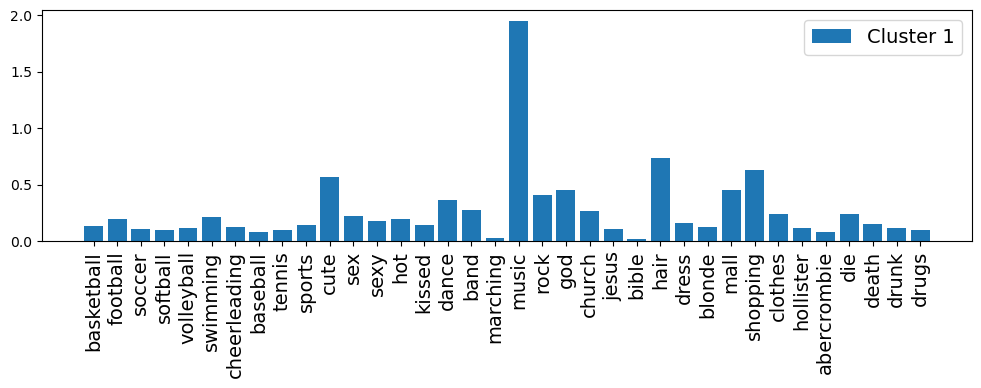

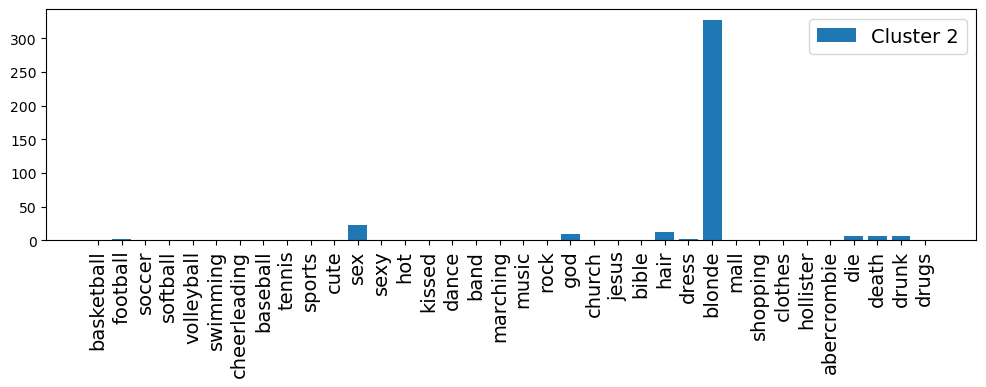

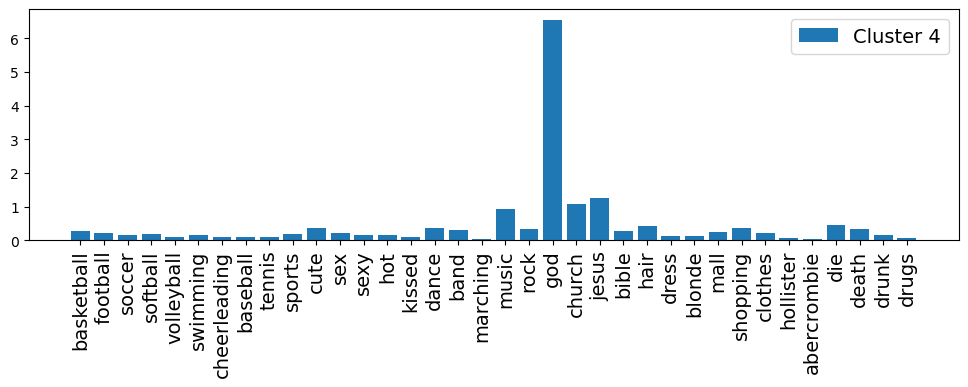

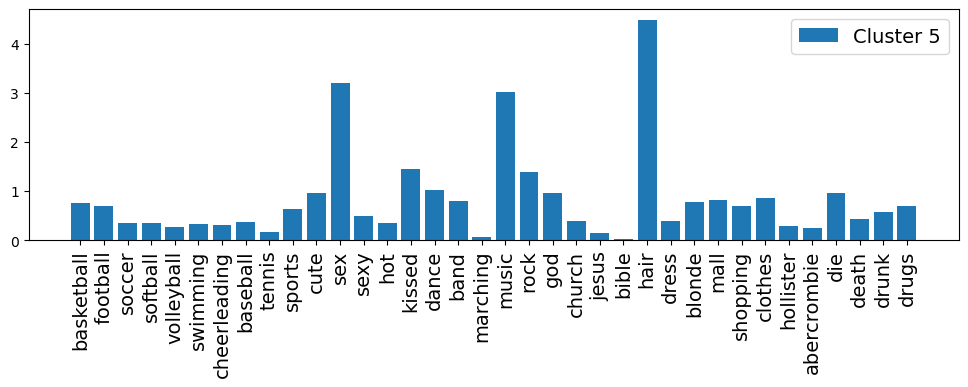

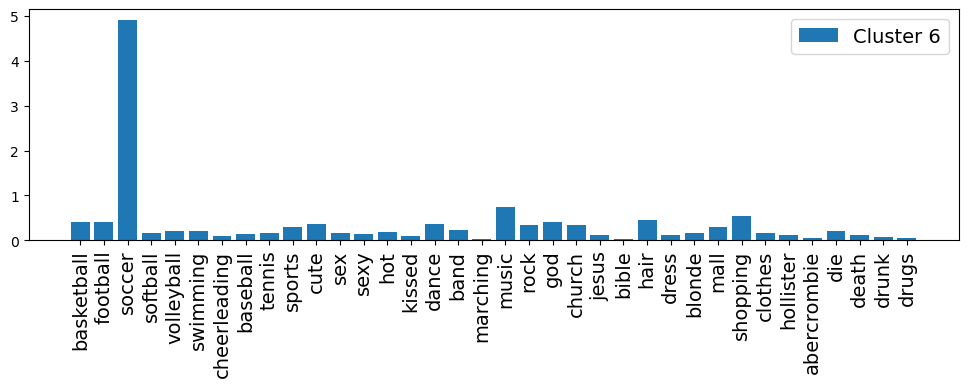

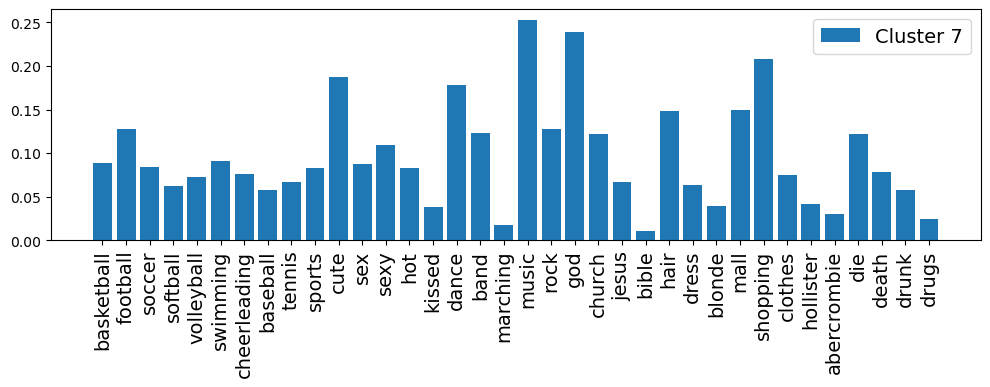

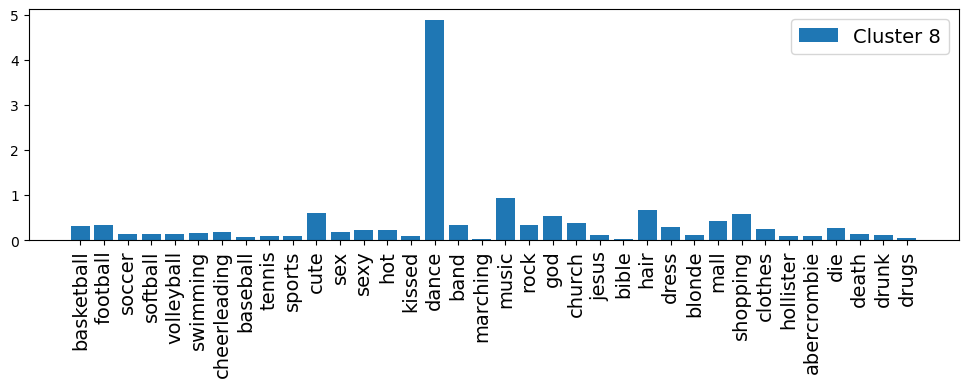

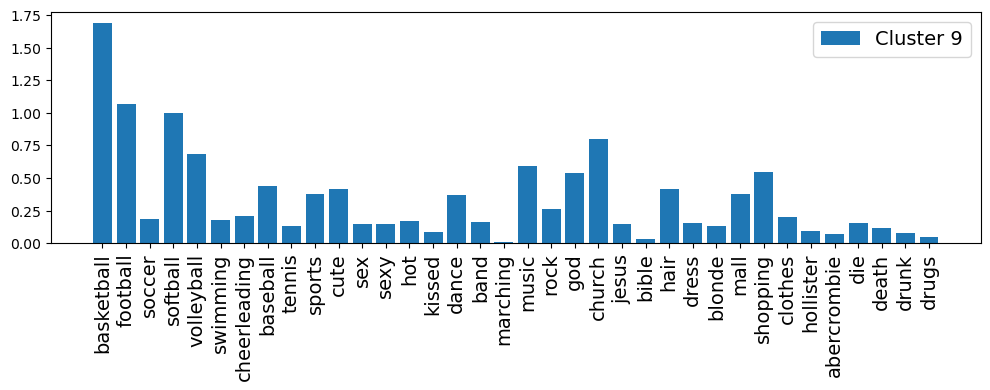

In [30]:
# plot cluster centers

for i in range(len(cluster_centers)):
    plt.figure(figsize=(12, 3))
    plt.bar(np.arange(cluster_centers.shape[1]), cluster_centers[i], label="Cluster "+str(i+1))
    plt.xticks(np.arange(len(word_cols)), word_cols, rotation=90, size=14)
    plt.legend(loc='best', fontsize=14)
    plt.show()

#### Task: find the optimal number of clusters in the sample. 

**Hint:** try to plot dependency of quality metrics from number of clusters. Which metrics will you choose? 

# Hierarchical Clustering

In [35]:
n_samples = 150
random_state = 170
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)

# To play with
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X = np.random.rand(n_samples, 2)

In [36]:
# example of objects in the feature matrix
X[:5]

array([[-1.02968126,  0.10465734],
       [ 0.06464933,  0.56652277],
       [ 0.42551368,  0.19960435],
       [ 0.56633333, -0.86921149],
       [ 0.35965702, -0.93753825]])

In [37]:
# example of cluster labels
y[:5]

array([0, 1, 1, 0, 0])

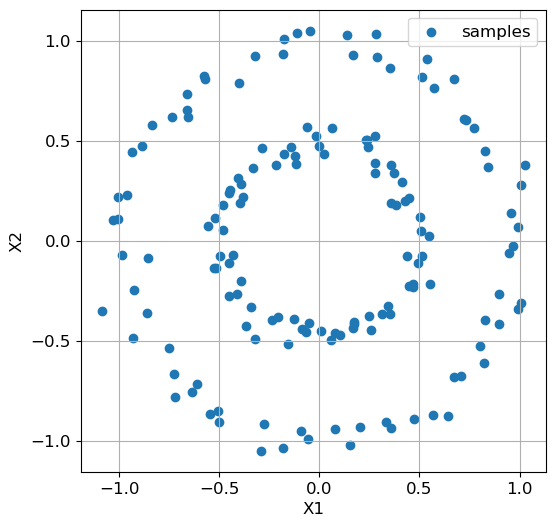

In [38]:
plt.figure(figsize=(6, 6))
plot_clusters(X, y=None)

## Agglomerative Clustering

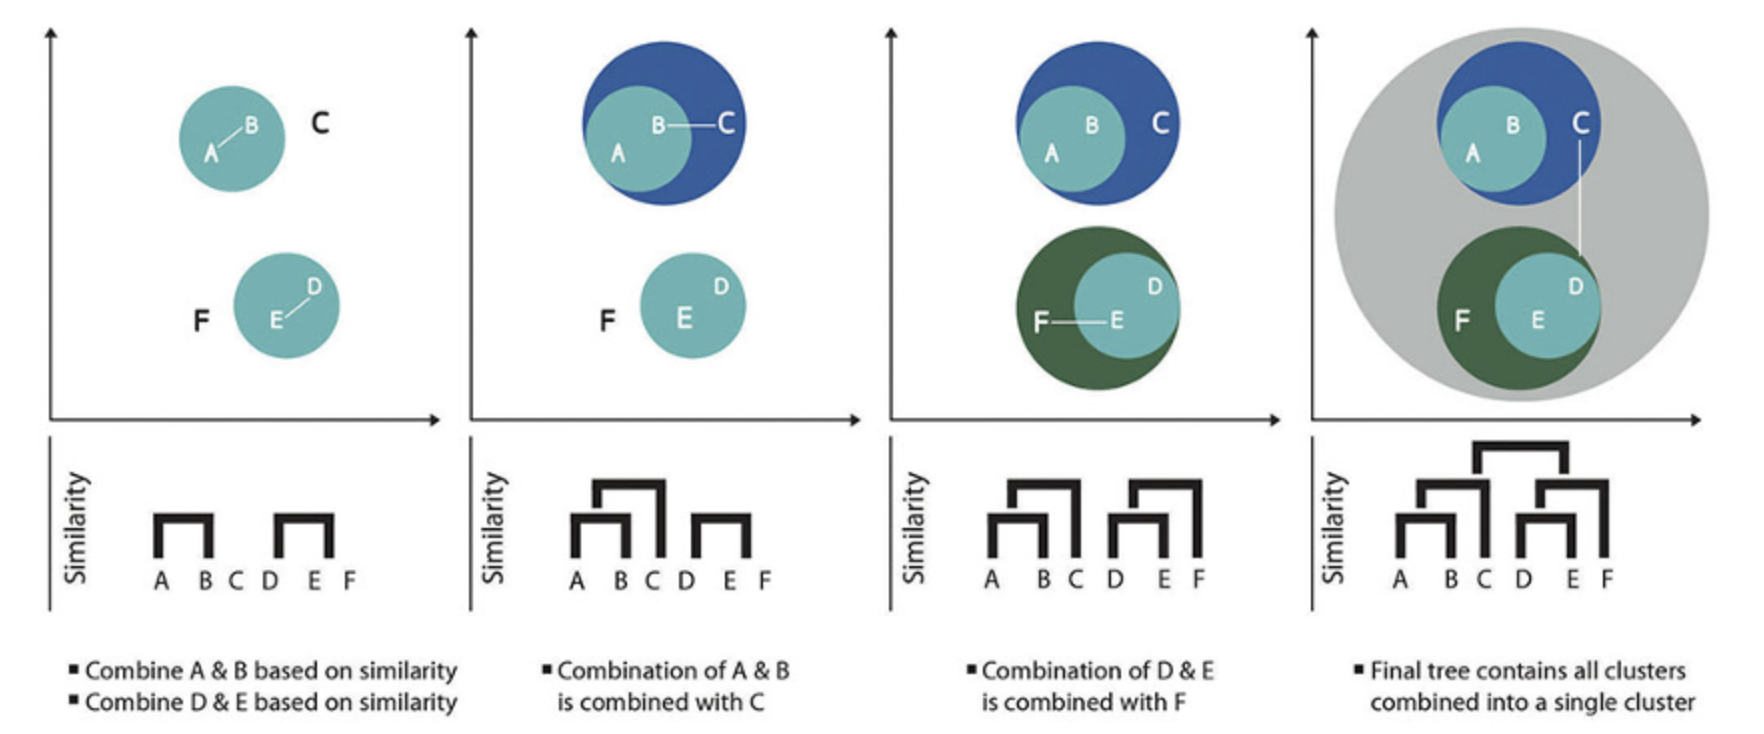

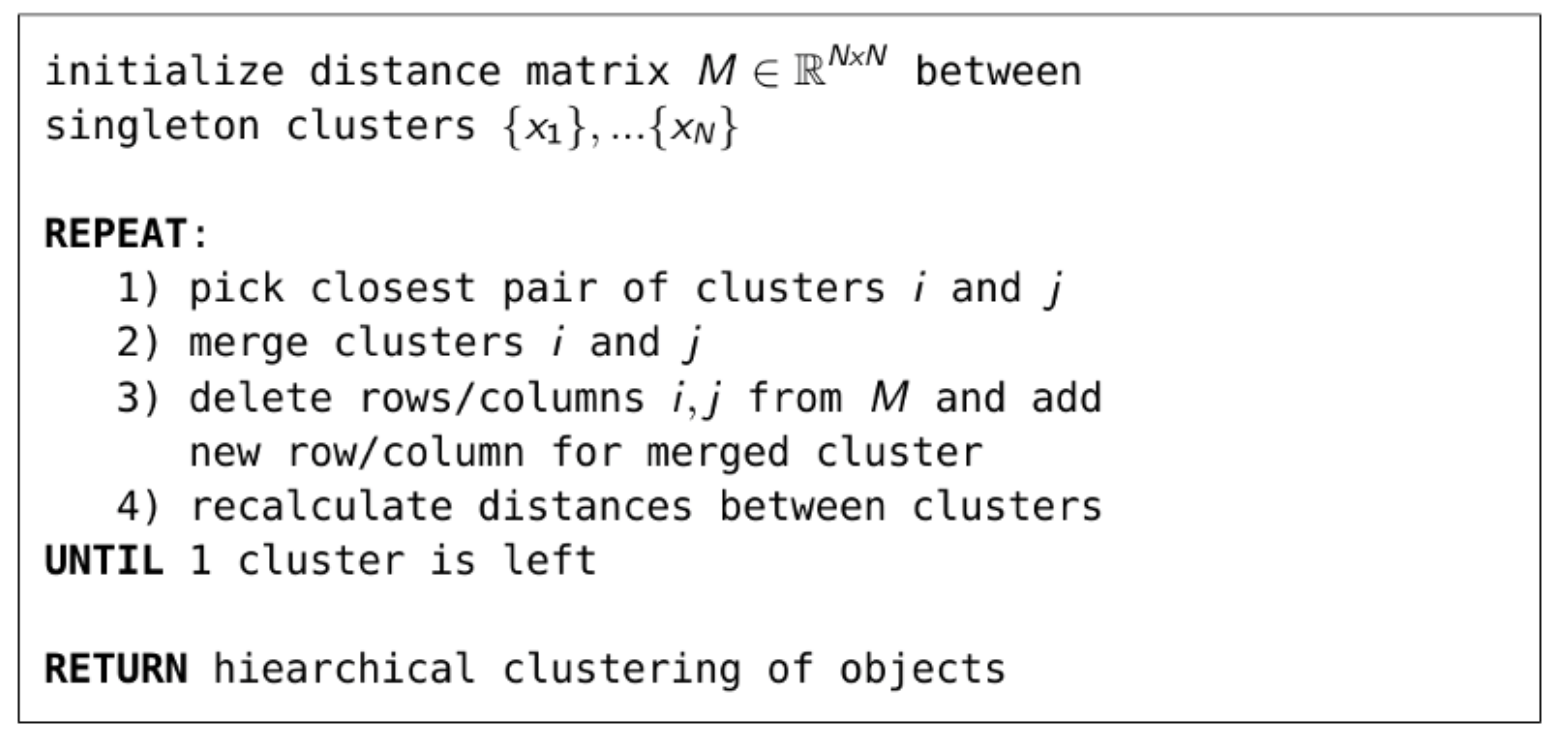

In [39]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

# calculate distance matrix between points and clusters
Z = linkage(X, method='complete', metric='euclidean')

In [41]:
Z.shape, X.shape

((149, 4), (150, 2))

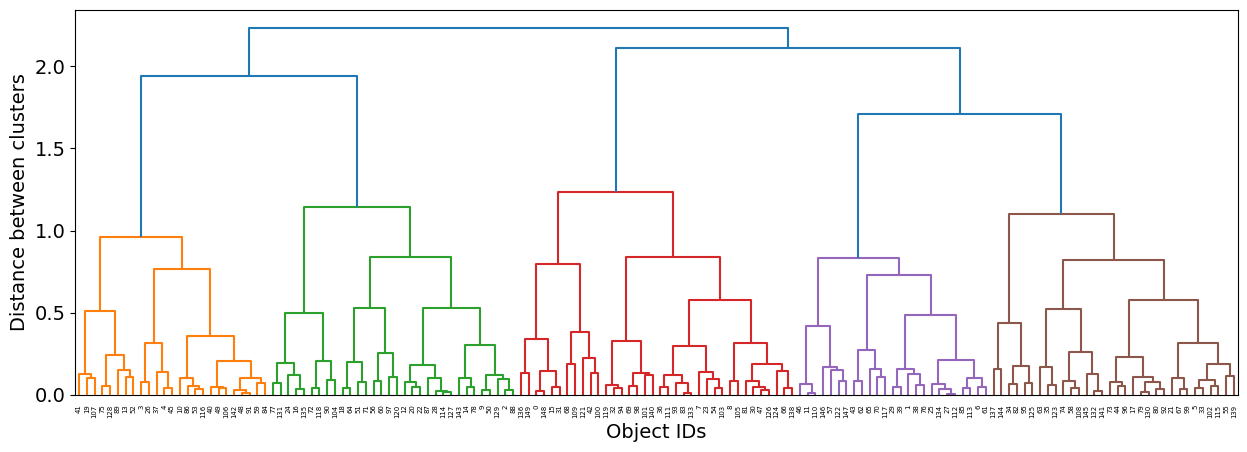

In [42]:
plt.figure(figsize=(15, 5))

dend = dendrogram(Z, labels=np.arange(len(X)), orientation='top')

plt.yticks(size=14)
plt.xticks(size=5)
plt.ylabel("Distance between clusters", size=14)
plt.xlabel("Object IDs", size=14)
plt.show()

In [43]:
# find clusters using the linkage matrix
y_pred = fcluster(Z, 2, criterion='maxclust')

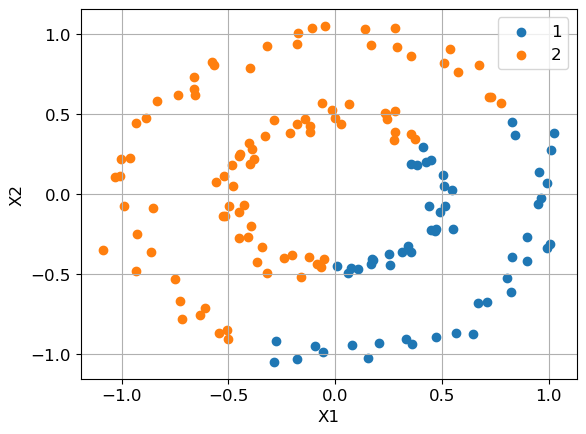

In [44]:
plot_clusters(X, y_pred)

#### Task: using example above, find the best hyperparameters of the agglomerative clustering algorithm.

**Hint:** try different kinds of linkage methods between clusters.

In [37]:
def plot_multiple_agglo_clustering(X):
    """
    Function only prints and plots clustering for different methods.

    Parameters:
    -----------
    X: numpy.array
        Object coordinates.
    """
    raise NotImplementedError

complete


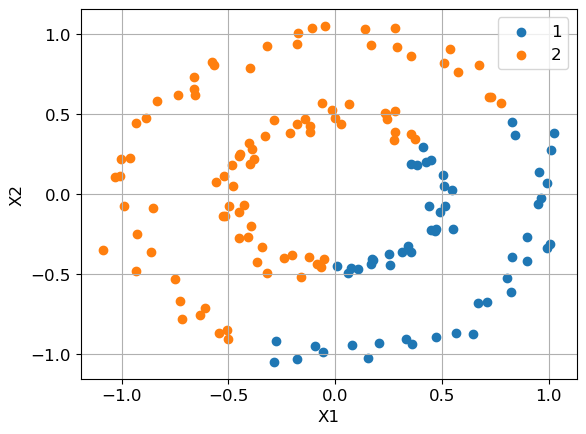

single


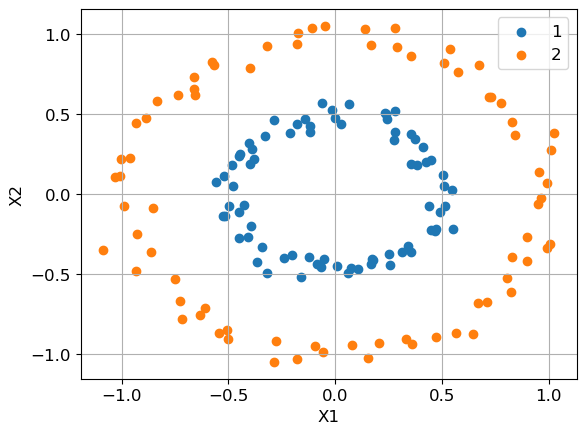

average


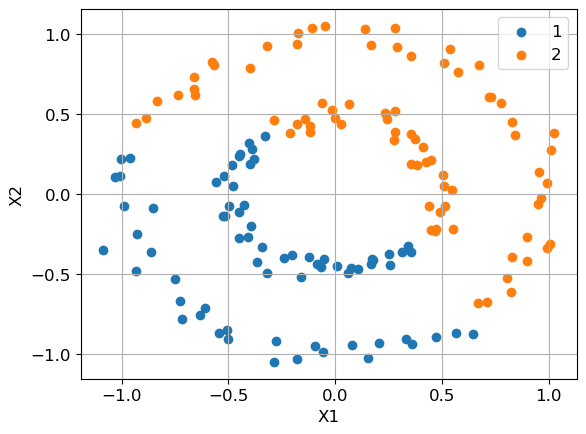

centroid


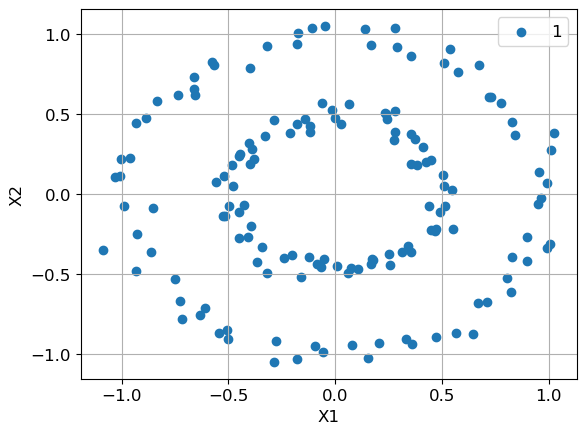

weighted


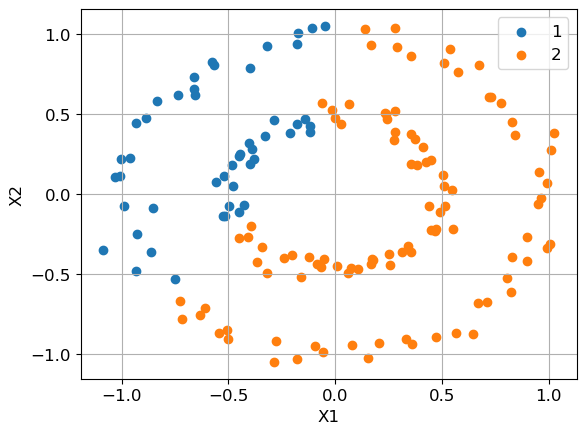

median


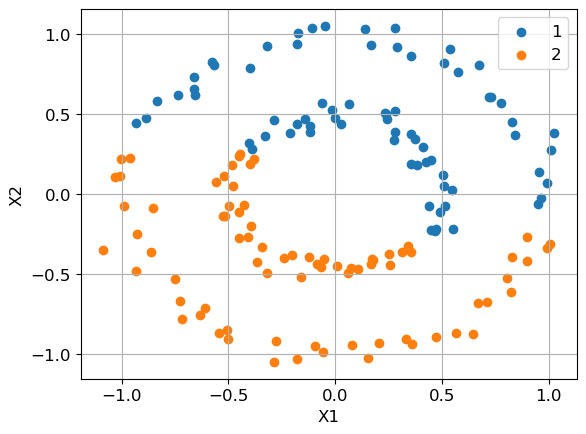

ward


In [38]:
plot_multiple_agglo_clustering(X)

In [39]:
Z = ... # best agglomerative clustering method
y_pred_best = fcluster(Z, 2, criterion='maxclust')

In [42]:
assert np.all(y_pred_best[:20] == np.array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2]))

Expected output:

<center>   
    
```python
array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2], dtype=int32)
    
``` 
    
</center>

## Cophenetic correlation


**Cophenetic distance** between objects $x_i$ and $x_j$ - height of dendrogram at which whose two objects have merged:
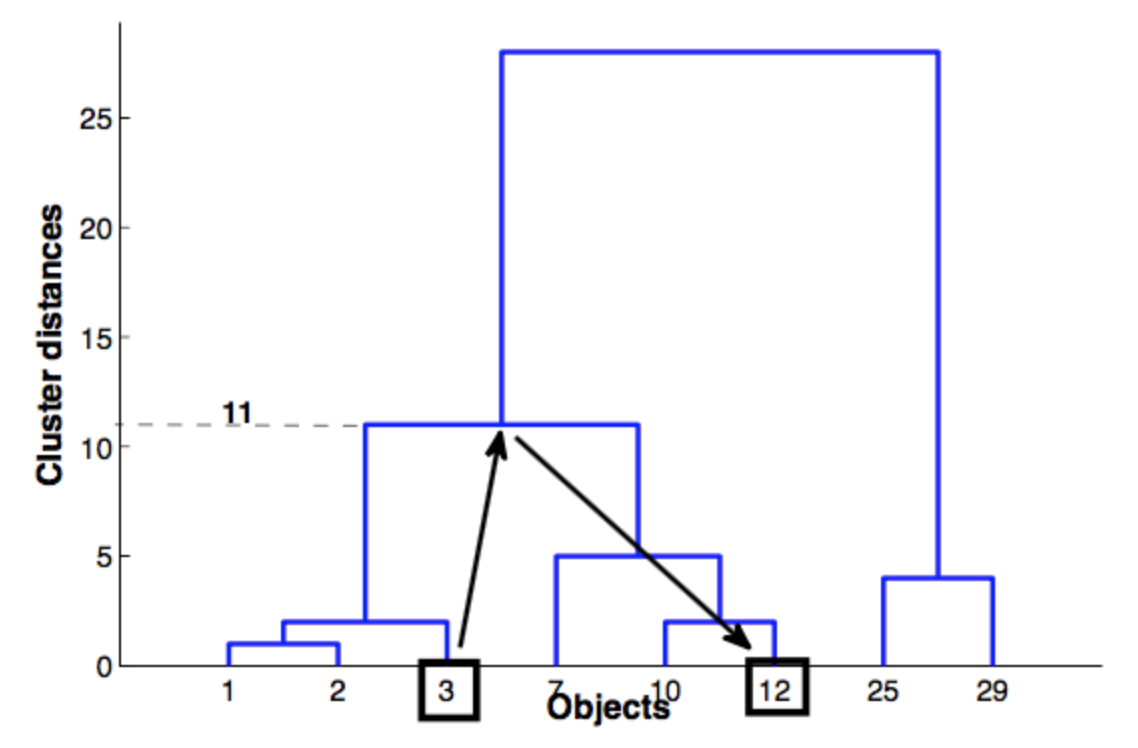

**Cophenetic correlation** is correlation between Cophenetic distance $coph(x_i, x_j)$ and simple distance $d(x_i, x_j)$ between objects:

$$
CophCorr = \frac{\sum_{i<j} (d(x_i, x_j) - \bar{d})(coph(x_i, x_j) - \bar{coph})}{\sqrt{\sum_{i<j} (d(x_i, x_j) - \bar{d})^2\sum_{i<j}(coph(x_i, x_j) - \bar{coph})^2}}
$$

Usisally, if dendrogram is good, correlation should be high.

### Food Clustering

Consider the following sample of nutritional value of products. It contains the following columns:

- "Name" is the name of the item.
- "Energy" is the number of calories.
- "Protein" is the amount of protein in grams.
- "Fat" is the amount of fat in grams.
- "Calcium" is the amount of calcium in milligrams.
- "Iron" is the amount of iron in milligrams.

In [45]:
df = pd.read_csv('food.txt', sep=' ')
df.head()

Name  Energy  Protein  Fat  Calcium  Iron
0  Braised beef     340       20   28        9   2.6
1     Hamburger     245       21   17        9   2.7
2    Roast beef     420       15   39        7   2.0
3     Beefsteak     375       19   32        9   2.6
4   Canned beef     180       22   10       17   3.7

In [46]:
X = df.iloc[:, 1:]
X = (X - X.mean(axis=0)) / X.std(axis=0)

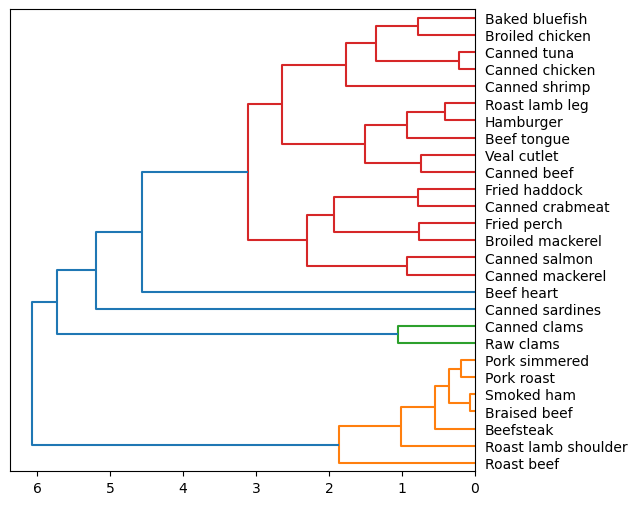

In [47]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# calculate distance matrix between points and clusters
Z = linkage(X, method='complete', metric='euclidean')

plt.figure(figsize=(6, 6))
names = df.Name.values
dend = dendrogram(Z, labels=names, orientation='left')

In [48]:
corr, coph_dists = cophenet(Z, pdist(X))
print("Cophenetic correlation: ", corr)

Cophenetic correlation:  0.7136761439194088


In [49]:
# select clusters with the max distance 2.5 between them
y_pred = fcluster(Z, 2.5, criterion='distance')

In [50]:
df.loc[:, 'labels'] = y_pred

for i, gr in df.groupby('labels'):
    print('Cluster {}'.format(i))
    display(gr)

Cluster 1


Name  Energy  Protein  Fat  Calcium  Iron  labels
0          Braised beef     340       20   28        9   2.6       1
2            Roast beef     420       15   39        7   2.0       1
3             Beefsteak     375       19   32        9   2.6       1
9   Roast lamb shoulder     300       18   25        9   2.3       1
10           Smoked ham     340       20   28        9   2.5       1
11           Pork roast     340       19   29        9   2.5       1
12        Pork simmered     355       19   30        9   2.4       1

Cluster 2


Name  Energy  Protein  Fat  Calcium  Iron  labels
16     Raw clams      70       11    1       82   6.0       2
17  Canned clams      45        7    1       74   5.4       2

Cluster 3


Name  Energy  Protein  Fat  Calcium  Iron  labels
18   Canned crabmeat      90       14    2       38   0.8       3
19     Fried haddock     135       16    5       15   0.5       3
20  Broiled mackerel     200       19   13        5   1.0       3
21   Canned mackerel     155       16    9      157   1.8       3
22       Fried perch     195       16   11       14   1.3       3
23     Canned salmon     120       17    5      159   0.7       3

Cluster 4


Name  Energy  Protein  Fat  Calcium  Iron  labels
1        Hamburger     245       21   17        9   2.7       4
4      Canned beef     180       22   10       17   3.7       4
8   Roast lamb leg     265       20   20        9   2.6       4
13     Beef tongue     205       18   14        7   2.5       4
14     Veal cutlet     185       23    9        9   2.7       4

Cluster 5


Name  Energy  Protein  Fat  Calcium  Iron  labels
5   Broiled chicken     115       20    3        8   1.4       5
6    Canned chicken     170       25    7       12   1.5       5
15   Baked bluefish     135       22    4       25   0.6       5
25      Canned tuna     170       25    7        7   1.2       5
26    Canned shrimp     110       23    1       98   2.6       5

Cluster 6


Name  Energy  Protein  Fat  Calcium  Iron  labels
7  Beef heart     160       26    5       14   5.9       6

Cluster 7


Name  Energy  Protein  Fat  Calcium  Iron  labels
24  Canned sardines     180       22    9      367   2.5       7

#### Task: Using the example above, find a linkage method ('complete', 'single', 'average', 'centroid', 'ward') that provides the highest cophenetic correlation.
Then, plot the dendrogram and find clusters with the max distance 2.5 between them. 

In [50]:
Z_best = None
corr_best = 0
method_best = None

for method in ['complete', 'single', 'average', 'centroid', 'ward']:
    
    raise NotImplementedError
        
print("The best method: ", method_best)

The best method:  average


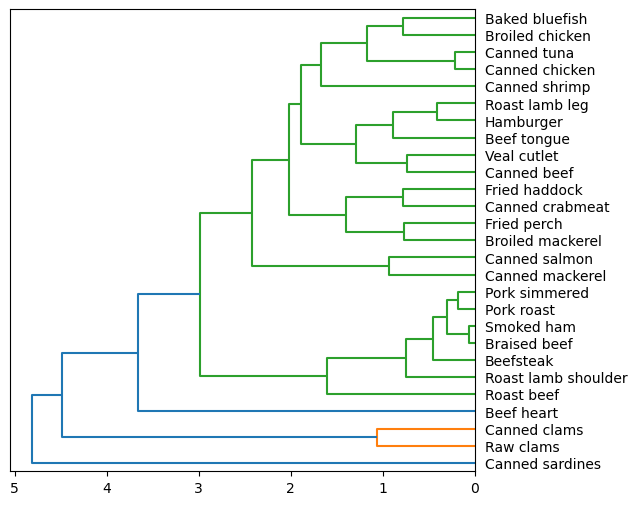

Cluster 1


Name  Energy  Protein  Fat  Calcium  Iron  labels
16     Raw clams      70       11    1       82   6.0       1
17  Canned clams      45        7    1       74   5.4       1

Cluster 2


Name  Energy  Protein  Fat  Calcium  Iron  labels
0          Braised beef     340       20   28        9   2.6       2
2            Roast beef     420       15   39        7   2.0       2
3             Beefsteak     375       19   32        9   2.6       2
9   Roast lamb shoulder     300       18   25        9   2.3       2
10           Smoked ham     340       20   28        9   2.5       2
11           Pork roast     340       19   29        9   2.5       2
12        Pork simmered     355       19   30        9   2.4       2

Cluster 3


Name  Energy  Protein  Fat  Calcium  Iron  labels
1          Hamburger     245       21   17        9   2.7       3
4        Canned beef     180       22   10       17   3.7       3
5    Broiled chicken     115       20    3        8   1.4       3
6     Canned chicken     170       25    7       12   1.5       3
8     Roast lamb leg     265       20   20        9   2.6       3
13       Beef tongue     205       18   14        7   2.5       3
14       Veal cutlet     185       23    9        9   2.7       3
15    Baked bluefish     135       22    4       25   0.6       3
18   Canned crabmeat      90       14    2       38   0.8       3
19     Fried haddock     135       16    5       15   0.5       3
20  Broiled mackerel     200       19   13        5   1.0       3
21   Canned mackerel     155       16    9      157   1.8       3
22       Fried perch     195       16   11       14   1.3       3
23     Canned salmon     120       17    5      159   0.7       3
25       Canned tuna     170       25    7        7   1.2       3
26     Canned shrimp     110       23    1       98   2.6       3

Cluster 4


Name  Energy  Protein  Fat  Calcium  Iron  labels
7  Beef heart     160       26    5       14   5.9       4

Cluster 5


Name  Energy  Protein  Fat  Calcium  Iron  labels
24  Canned sardines     180       22    9      367   2.5       5

In [56]:
plt.figure(figsize=(6, 6))
names = df.Name.values
dend = dendrogram(Z_best, labels=names, orientation='left')
plt.show()

y_pred = fcluster(Z_best, 2.5, criterion='distance')

df.loc[:, 'labels'] = y_pred

for i, gr in df.groupby('labels'):
    print('Cluster {}'.format(i))
    display(gr)

assert np.all(y_pred[:20] == np.array([2, 3, 2, 2, 3, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3]))

Expected output:

<center>   
    
```python
Output: [2 3 2 2 3 3 3 4 3 2 2 2 2 3 3 3 1 1 3 3]
    
``` 
    
</center>

# DBSCAN

<p><a href="https://commons.wikimedia.org/wiki/File:DBSCAN-Illustration.svg#/media/Файл:DBSCAN-Illustration.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png" alt="DBSCAN-Illustration.svg" width="450" height="450"> </a><br>Автор: <a href="//commons.wikimedia.org/wiki/User:Chire" title="User:Chire">Chire</a> &mdash; <span class="int-own-work" lang="ru">собственная работа</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>

In [57]:
from sklearn import datasets

n_samples = 200
random_state = 170
X, y = datasets.make_moons(n_samples=n_samples, noise=0.075, random_state=random_state)

# To play with
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X = np.random.rand(n_samples, 2)

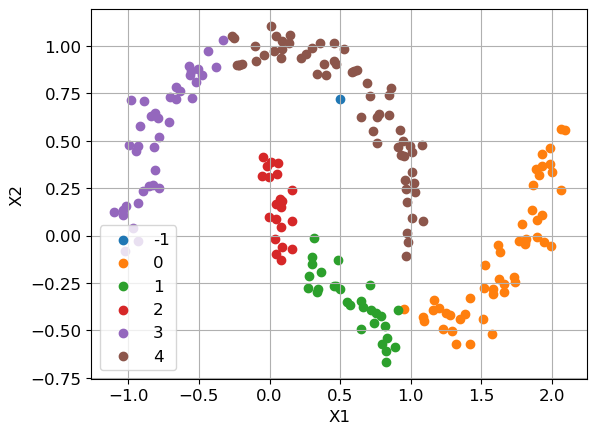

In [58]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=0.15, min_samples=5)
y_pred = clusterer.fit_predict(X)

plot_clusters(X, y_pred)

#### Task: Try to find optimal values of `eps` and `min_samples` parameters above to achieve the best clustering results.
How are you going to do this?

How to select parameters of DBSCAN algorithm properly? One more **elbow** method!

In [59]:
from sklearn.neighbors import NearestNeighbors

k = 10

# estimate k neighbors for each point in X
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# calculate distances for each of k nearest neighbors
dists, _ = nn.kneighbors(X, n_neighbors=k)

# take distaces only for the k-th neighbors
dist_kth = dists[:, k-1]

# sort the distances
dist_kth.sort()

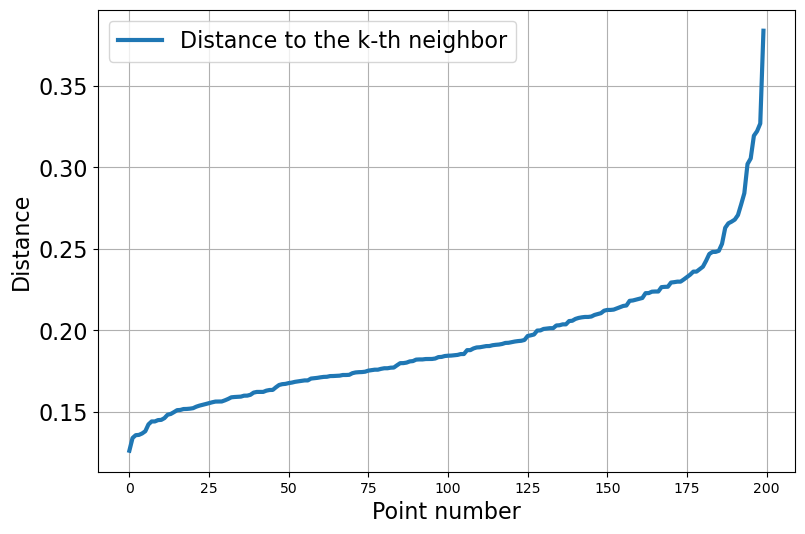

In [60]:
plt.figure(figsize=(9, 6))
plt.plot(dist_kth, linewidth=3, label='Distance to the k-th neighbor')
plt.xlabel('Point number', size=16)
plt.ylabel('Distance', size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.show()